In [2]:
import sys
from os import path
sys.path.insert(0, "../../ISANet/")
sys.path.insert(0, "./")

from isanet.model import Mlp
from isanet.optimizer import SGD
from isanet.datasets.monk import load_monk
from isanet.utils.model_utils import printMSE, printAcc, plotHistory
import numpy as np
from tabulate import tabulate

In [2]:
def print_table(data):
    table = [["Training Set",data[0],data[1]],
         ["Test Set",data[2],data[3]]]
    print(tabulate(table, headers=["MSE", "Accuracy"]))

def print_table_final(data):
    table = [["Training Set",data[0],data[1], data[2], data[3]],
         ["Test Set",data[4],data[5],data[6], data[7] ]]
    print(tabulate(table, headers=["Mean mse","Std mse", "Mean Accuracy", "Std Accuracy"]))

# monk3

In [3]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("3", "train")
X_test, Y_test = load_monk("3", "test")

Load Monk DataSet


# overfitting

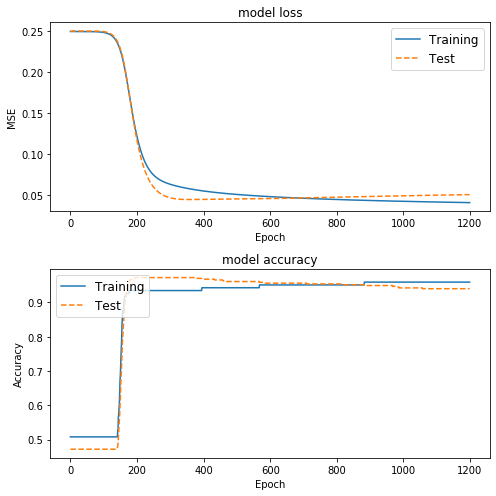

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0404833    0.959016
Test Set      0.0503221    0.939815


In [4]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.00001, kernel_regularizer = 0)
model.add(1, kernel_initializer = 0.00001, kernel_regularizer = 0)

model.set_optimizer(
    SGD(
        lr = 0.8,
        momentum = 0.6,
        nesterov = True
    )
)
# Batch
model.fit(X_train,
            Y_train, 
            epochs=1200, 
            #batch_size=1,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

# test online

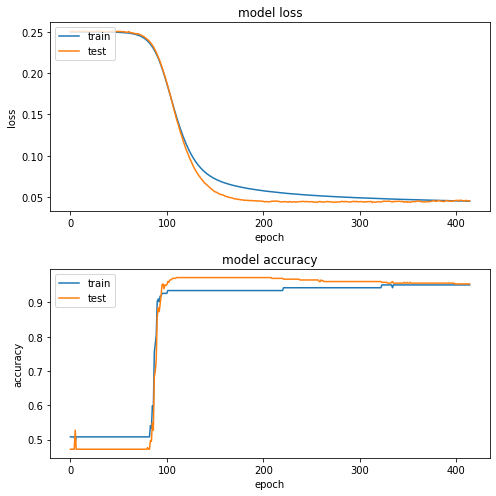

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0449259    0.95082
Test Set      0.0454413    0.953704


In [54]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0)

model.set_optimizer(
    SGD(
        lr = 0.01,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=415, 
            batch_size=1,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

# relu + batch

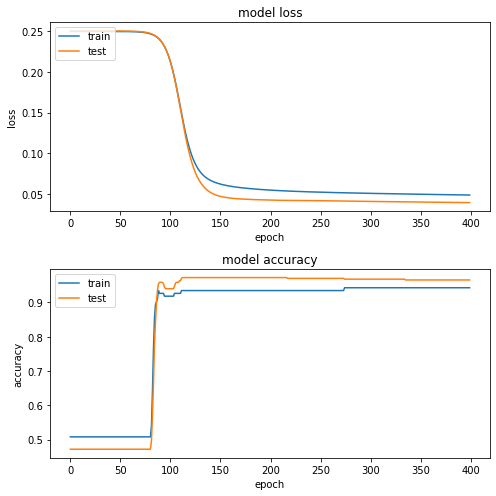

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0485903    0.942623
Test Set      0.0392464    0.965278


In [55]:
model = Mlp()
model.add(4, input= 17, activation="relu", kernel_initializer = 0.001, kernel_regularizer = 0.0025)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0.0025)

model.set_optimizer(
    SGD(
        lr = 0.4,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=400, 
            #batch_size=1,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

# mini batch + sigmoid

Questo fatto non è il minibatch, ma l'online.

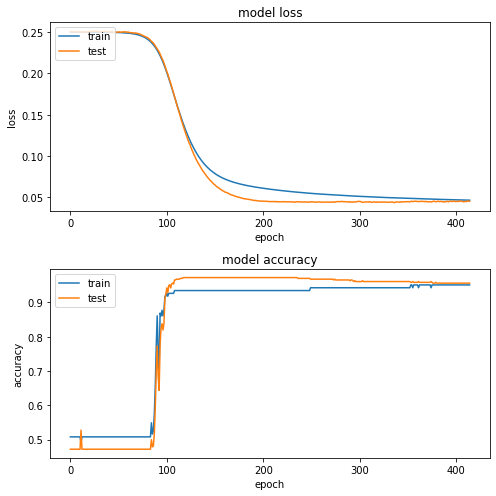

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0466381    0.95082
Test Set      0.0452299    0.956019


In [56]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0)

model.set_optimizer(
    SGD(
        lr = 0.01,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=415, 
            batch_size=1,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

# test 1

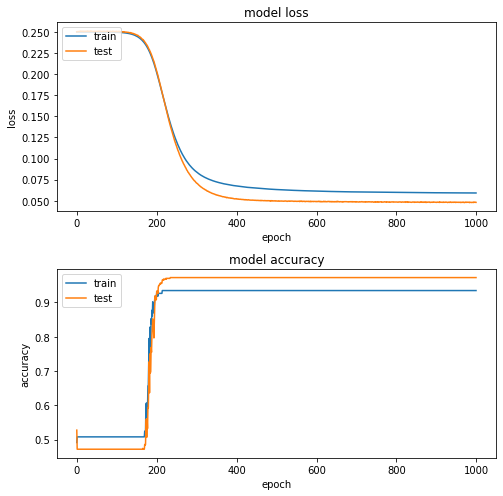

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0592555    0.934426
Test Set      0.0481335    0.972222


In [57]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0.001)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0.001)

model.set_optimizer(
    SGD(
        lr = 0.7,
        momentum = 0.3,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=1000, 
            batch_size=61,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

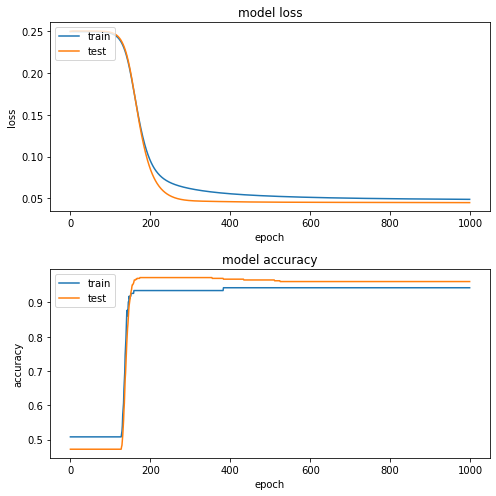

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0486904    0.942623
Test Set      0.0447711    0.960648


In [58]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0.001)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0.001)

model.set_optimizer(
    SGD(
        lr = 0.9,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=1000, 
            #batch_size=31,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

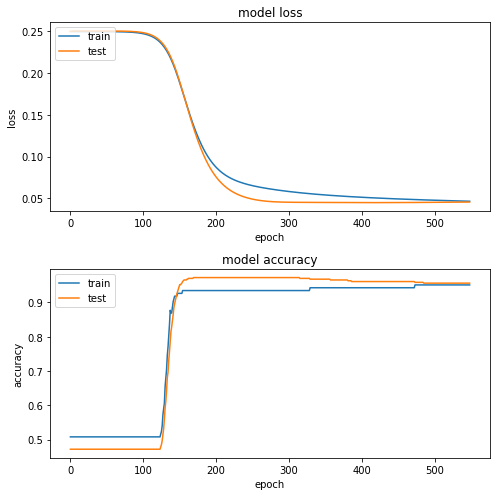

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.046458     0.95082
Test Set      0.0455318    0.956019


In [59]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.001, kernel_regularizer = 0)
model.add(1, kernel_initializer = 0.001, kernel_regularizer = 0)

model.set_optimizer(
    SGD(
        lr = 0.9,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=549, 
            #batch_size=31,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

# final no reg

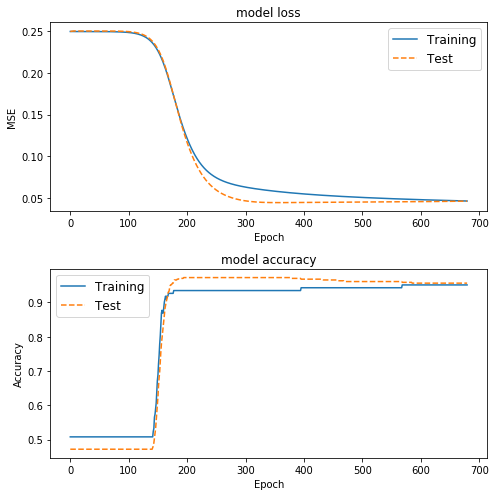

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.0461837    0.95082
Test Set      0.0460561    0.956019


In [4]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.0001, kernel_regularizer = 0)
model.add(1, kernel_initializer = 0.0001, kernel_regularizer = 0)

model.set_optimizer(
    SGD(
        lr = 0.8,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=680, 
            #batch_size=31,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

MSE test: 0.046709249056924605 
Accuracy test: 0.9537037037037037 


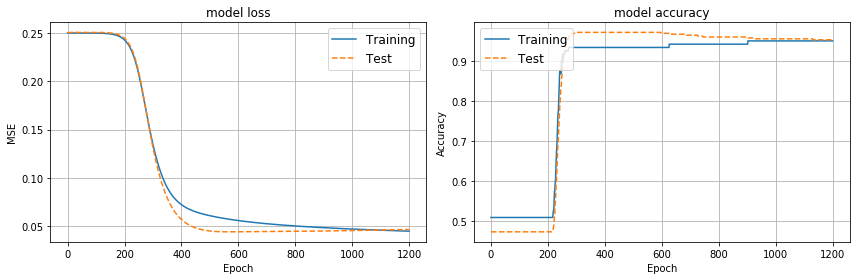

MSE test: 0.04670593495541979 
Accuracy test: 0.9537037037037037 


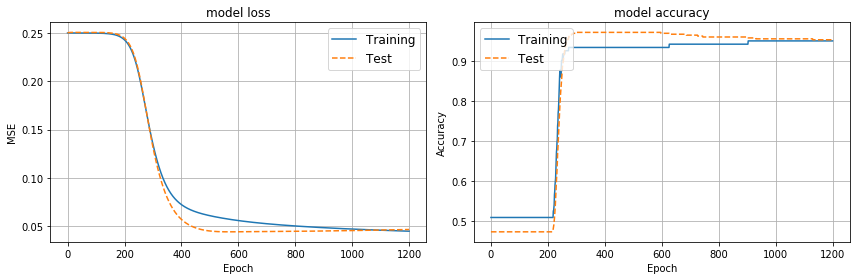

MSE test: 0.04670846631150411 
Accuracy test: 0.9537037037037037 


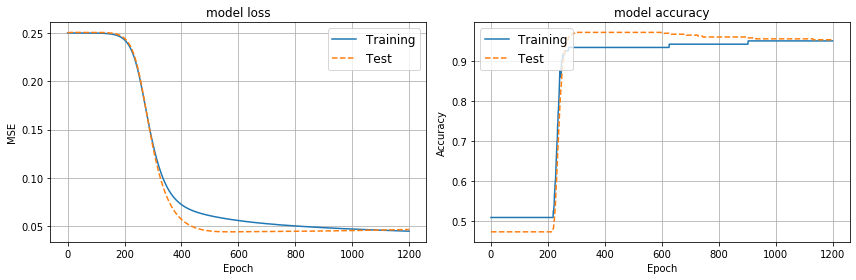

MSE test: 0.04670297616527468 
Accuracy test: 0.9537037037037037 


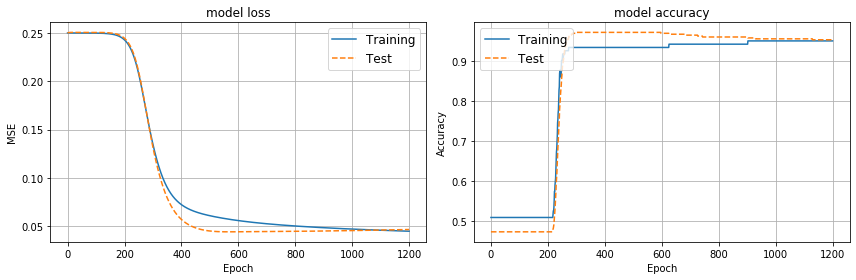

MSE test: 0.04670187523973873 
Accuracy test: 0.9537037037037037 


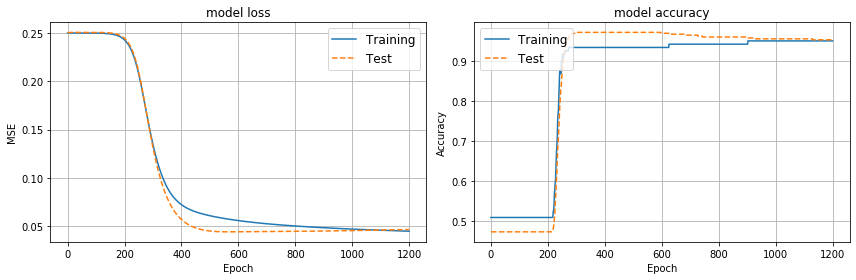

MSE test: 0.04670686560811718 
Accuracy test: 0.9537037037037037 


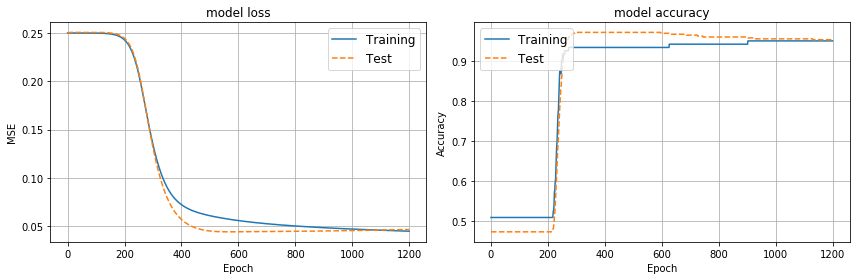

MSE test: 0.046700825013132115 
Accuracy test: 0.9537037037037037 


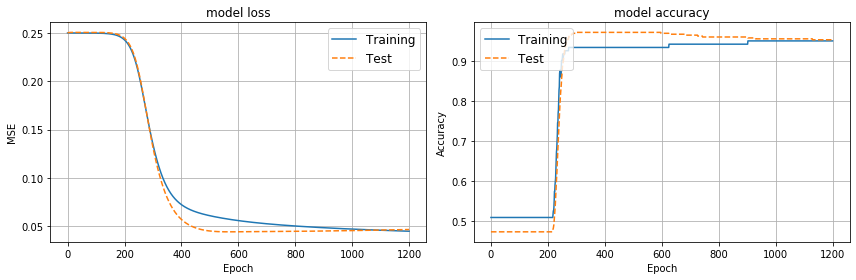

MSE test: 0.04670321571542108 
Accuracy test: 0.9537037037037037 


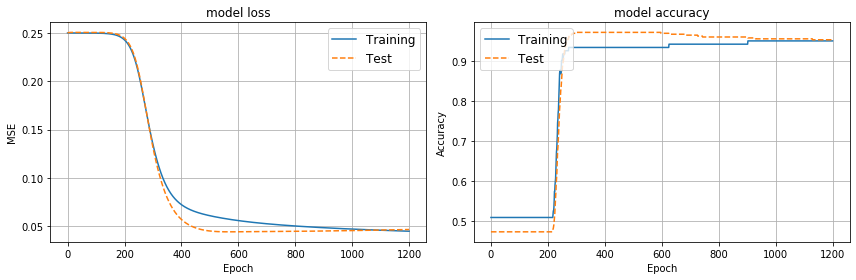

MSE test: 0.0467089629114006 
Accuracy test: 0.9537037037037037 


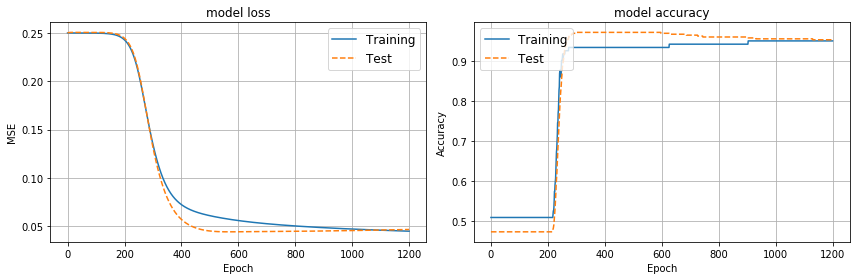

Final result


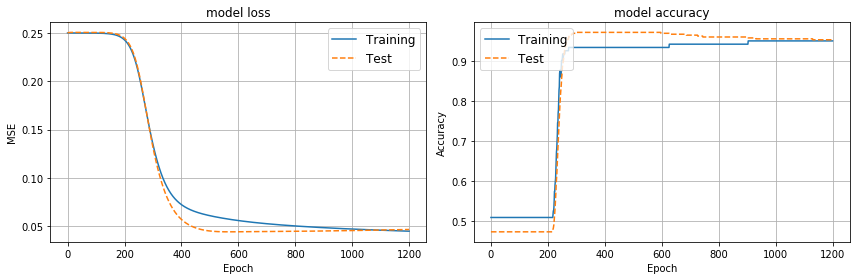

                Mean mse      Std mse    Mean Accuracy    Std Accuracy
------------  ----------  -----------  ---------------  --------------
Training Set   0.0449697  5.4906e-06          0.95082      1.11022e-16
Test Set       0.0467054  3.04304e-06         0.953704     0


In [11]:
np.random.seed(47)
mse_means_train = []
accs_means_train = []

mse_means_val = []
accs_means_val = []
for i in range(0,9):
    model = Mlp()
    model.add(4, input= 17, kernel_initializer = 0.0001, kernel_regularizer = 0)
    model.add(1, kernel_initializer = 0.0001, kernel_regularizer = 0)

    model.set_optimizer(
        SGD(
            lr = 0.8,
            momentum = 0.6,
            nesterov = True
        ))
    # Batch
    model.fit(X_train,
                Y_train, 
                epochs=1200, 
                #batch_size=31,
                validation_data = [X_test, Y_test],
                verbose=0) 

    outputNet = model.predict(X_test)

    mse_means_train.append(model.history["loss_mse"][-1])
    accs_means_train.append(model.history["acc"][-1])
    mse_means_val.append(model.history["val_loss_mse"][-1])
    accs_means_val.append(model.history["val_acc"][-1])
    
    outputNet = model.predict(X_test)

    printMSE(outputNet, Y_test, type = "test")
    printAcc(outputNet, Y_test, type = "test")
    plotHistory(model.history )

print("Final result")
plotHistory(model.history )
data = [    np.mean(mse_means_train),
            np.std(mse_means_train),
            np.mean(accs_means_train),
            np.std(accs_means_train),
            np.mean(mse_means_val),
            np.std(mse_means_val),
            np.mean(accs_means_val),
            np.std(accs_means_val)
       ]
print_table_final(data)

# final + reg single test

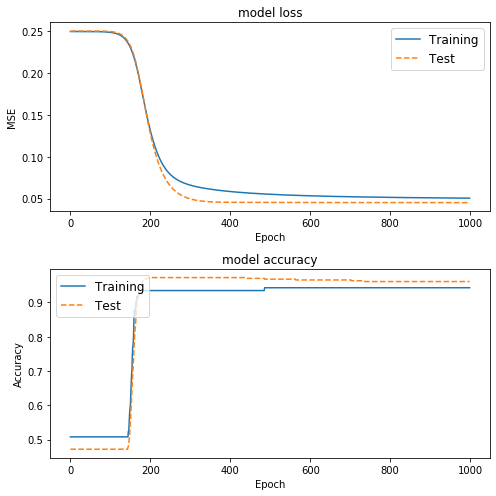

                    MSE    Accuracy
------------  ---------  ----------
Training Set  0.05059      0.942623
Test Set      0.0452567    0.960648


In [7]:
model = Mlp()
model.add(4, input= 17, kernel_initializer = 0.0001, kernel_regularizer =  0.001)
model.add(1, kernel_initializer = 0.0001, kernel_regularizer =  0.001)

model.set_optimizer(
    SGD(
        lr = 0.8,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
model.fit(X_train,
            Y_train, 
            epochs=1000, 
            #batch_size=31,
            validation_data = [X_test, Y_test],
            verbose=0) 

plotHistory(model.history )
data = [   model.history["loss_mse"][-1],
           model.history["acc"][-1],
           model.history["val_loss_mse"][-1],
           model.history["val_acc"][-1]  
       ]
print_table(data)

# final + reg: mean and std

MSE test: 0.04605496538753959 
Accuracy test: 0.9675925925925926 


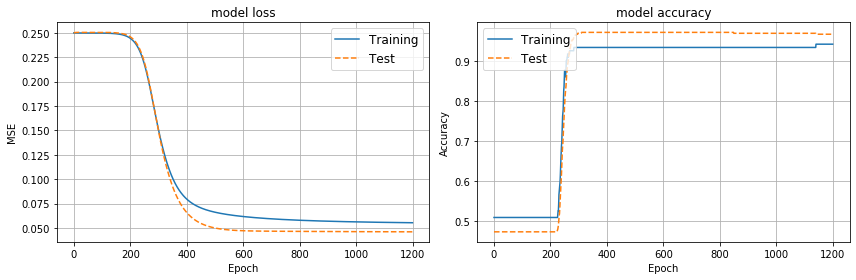

MSE test: 0.04604289227300363 
Accuracy test: 0.9675925925925926 


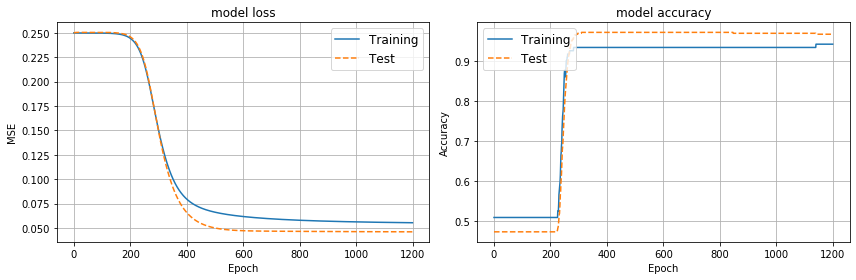

MSE test: 0.04604086948381957 
Accuracy test: 0.9675925925925926 


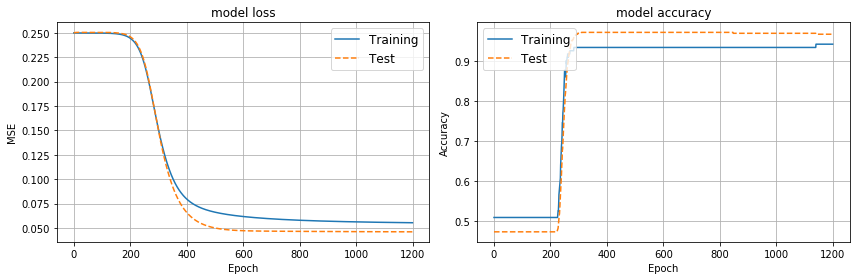

MSE test: 0.0460434848571381 
Accuracy test: 0.9675925925925926 


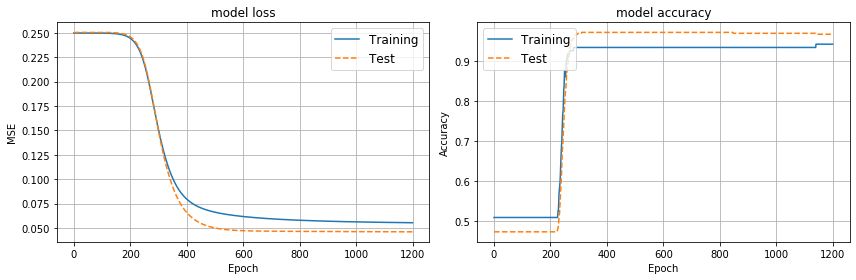

MSE test: 0.0460455393815899 
Accuracy test: 0.9675925925925926 


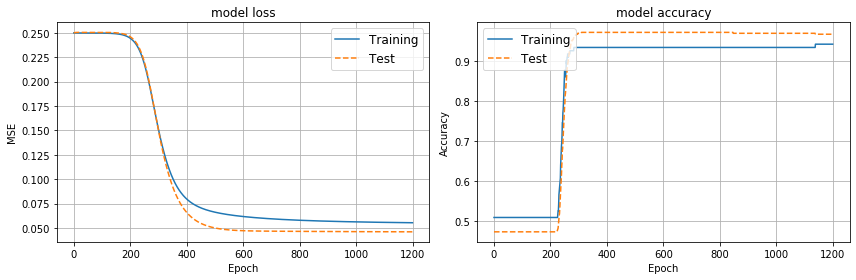

MSE test: 0.046049426222526 
Accuracy test: 0.9675925925925926 


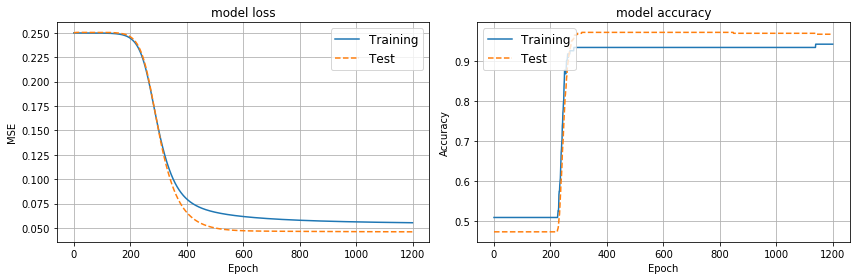

MSE test: 0.04603967739100328 
Accuracy test: 0.9675925925925926 


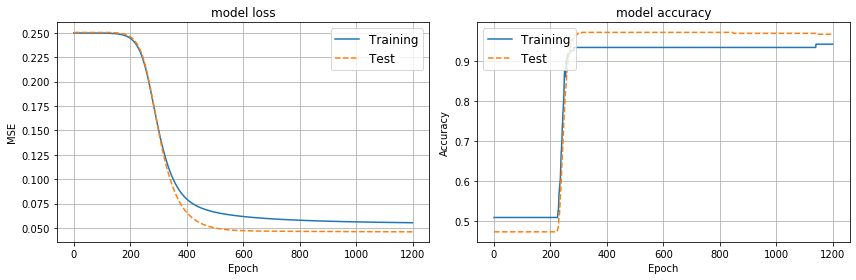

MSE test: 0.04605071185555903 
Accuracy test: 0.9675925925925926 


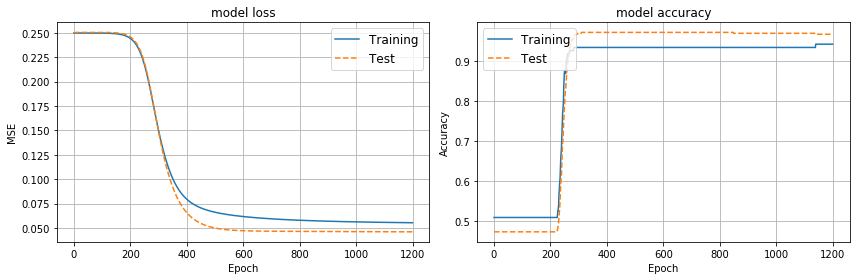

MSE test: 0.04605657970217206 
Accuracy test: 0.9675925925925926 


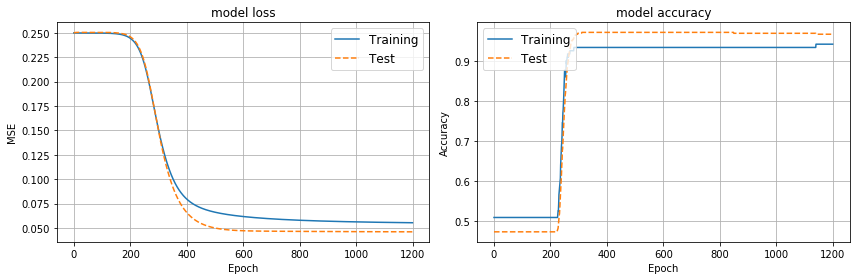

Final result


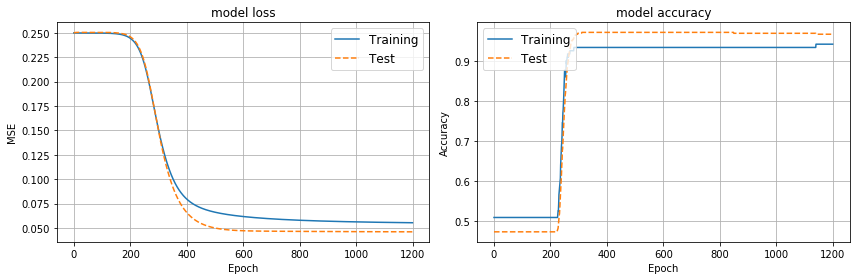

                Mean mse     Std mse    Mean Accuracy    Std Accuracy
------------  ----------  ----------  ---------------  --------------
Training Set   0.0553671  4.6359e-06         0.942623     0
Test Set       0.0460471  5.7475e-06         0.967593     1.11022e-16


In [5]:
mse_means_train = []
accs_means_train = []

mse_means_val = []
accs_means_val = []
for i in range(0,9):
    model = Mlp()
    model.add(4, input= 17, kernel_initializer = 0.0001, kernel_regularizer = 0.001)
    model.add(1, kernel_initializer = 0.0001, kernel_regularizer = 0.001)

    model.set_optimizer(
        SGD(
            lr = 0.8,
            momentum = 0.6,
            nesterov = True
        ))
    # Batch
    model.fit(X_train,
                Y_train, 
                epochs=1200, 
                #batch_size=31,
                validation_data = [X_test, Y_test],
                verbose=0) 

    outputNet = model.predict(X_test)

    mse_means_train.append(model.history["loss_mse"][-1])
    accs_means_train.append(model.history["acc"][-1])
    mse_means_val.append(model.history["val_loss_mse"][-1])
    accs_means_val.append(model.history["val_acc"][-1])
    
    outputNet = model.predict(X_test)

    printMSE(outputNet, Y_test, type = "test")
    printAcc(outputNet, Y_test, type = "test")
    plotHistory(model.history )

print("Final result")
plotHistory(model.history )
data = [    np.mean(mse_means_train),
            np.std(mse_means_train),
            np.mean(accs_means_train),
            np.std(accs_means_train),
            np.mean(mse_means_val),
            np.std(mse_means_val),
            np.mean(accs_means_val),
            np.std(accs_means_val)
       ]
print_table_final(data)